# Codigo para o desafio da CyberLabs, treinar um modelo para classificar cervejas e refrigerantes



*Tive alguns problemas em tentar treinar o modelo no jupyter notebook para melhor perfomance copiar o codigo para um arquivo .py e rodar

In [2]:
import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, random_rotation, random_shift
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.layers.convolutional import MaxPooling2D, Conv2D

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Cria CNN usando arquitetura LeNet
def LeNet(width,height,depth):

    shape = (width,height, depth)
    
    model = Sequential()
    
    model.add(Conv2D(20,(5,5),input_shape=shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(Conv2D(50,(5,5)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    
    return model

In [4]:
#Pega as imagens redimensiona elas 
def get_images(directory, size):
    
    data = []
    labels = []
    folders = os.listdir(directory)

    for folder in folders:
        images = os.listdir(directory+"\\"+folder)
        for img in images:
            image = cv2.imread(directory+"\\"+folder+"\\"+img)
            image = cv2.resize(image, (size,size)) 
            data.append(image)
            if folder == "Beers":
                labels.append(1) # 1 para cervejas
            else:
                labels.append(0) # 0 para refrigerantes
#Retorna uma tupla de dois vetores ordenados com as imagens, e labels respectivamente
    return (data,labels)

In [5]:
bs = 10
epochs = 200

#Carrega as Imagens, dividindo em train_data e test_data
train_data = []
train_labels = []

test_data = []
test_labels = []

(train_data, train_labels) = get_images("Images", 100)
(test_data, test_labels) = get_images("Test", 100)

#Normaliza as imagens, reduz tempo de treinamento/poder computacional necessario tambem transorma os vetores em 
train_data = np.array(train_data, dtype='float')/255.0 
test_data = np.array(test_data, dtype='float')/255.0

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#One-hot encoding dos labels []
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

#Inicializa Modelo
model = LeNet(100,100,3)
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

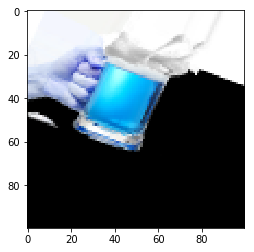

In [16]:
#Inicializa o Image augmentor do keras para dar mais variedade ao dataset
aug = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2, shear_range=0.2, zoom_range=0.4,horizontal_flip=True, fill_mode="nearest")

#Prepara o dataset auumentado as imagens
train_images = aug.flow(train_data,train_labels, batch_size=bs)
test_images = aug.flow(test_data,test_labels, batch_size=bs)

#Exemplo de imagem axumentada
img = train_images[0][0][0]
plt.imshow(img)

In [ ]:
#Treina o modelo
model.fit_generator(train_images,steps_per_epoch=100, epochs=epochs)

In [ ]:
score = model.evaluate_generator(test_batches)
#Mostra accuracy final
print(score[1])